In [1]:
import pandas as pd
df = pd.read_csv("data/dataset.csv")
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [ ]:
df.columns 

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date'],
      dtype='object')

In [3]:
df = df.drop(columns=['Unnamed: 0'])

df.rename(columns={
    'marketCap': 'market_cap'
}, inplace=True)

df.head()

,open,high,low,close,volume,market_cap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [4]:
df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
market_cap     0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [5]:
df.fillna(method='ffill', inplace=True)

/var/folders/x7/c_5x3phd67q2bp97khnl3gpm0000gn/T/ipykernel_6557/3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   open         72946 non-null  float64       
 1   high         72946 non-null  float64       
 2   low          72946 non-null  float64       
 3   close        72946 non-null  float64       
 4   volume       72946 non-null  float64       
 5   market_cap   72946 non-null  float64       
 6   timestamp    72946 non-null  object        
 7   crypto_name  72946 non-null  object        
 8   date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 5.0+ MB


In [8]:
df.describe()

,open,high,low,close,volume,market_cap,date
count,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04,72946
mean,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10,2019-10-13 03:20:59.945713152
min,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00,2013-05-05 00:00:00
25%,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08,2018-09-08 00:00:00
50%,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09,2020-03-17 00:00:00
75%,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09,2021-05-02 00:00:00
max,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12,2022-10-23 00:00:00
std,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10,NaN


Matplotlib is building the font cache; this may take a moment.


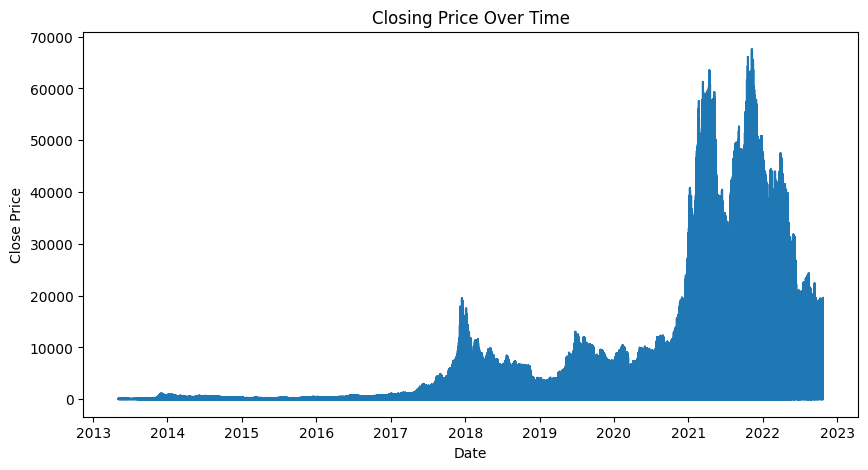

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['date'], df['close'])
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

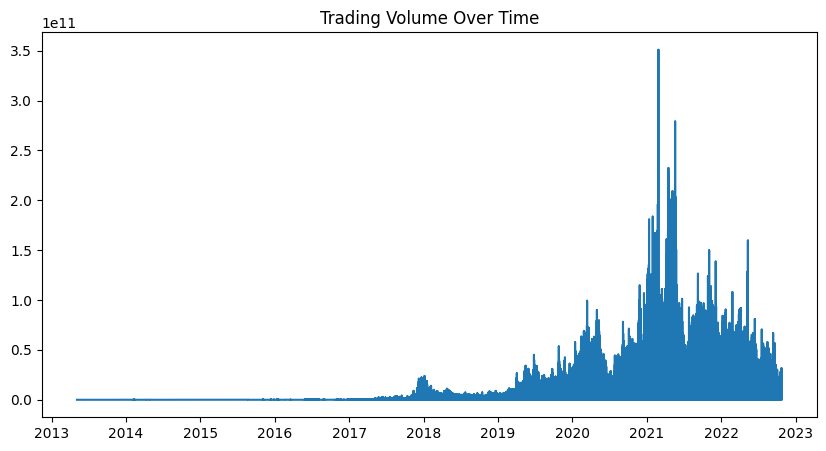

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['volume'])
plt.title("Trading Volume Over Time")
plt.show()

In [12]:
numeric_df = df.select_dtypes(include='number')

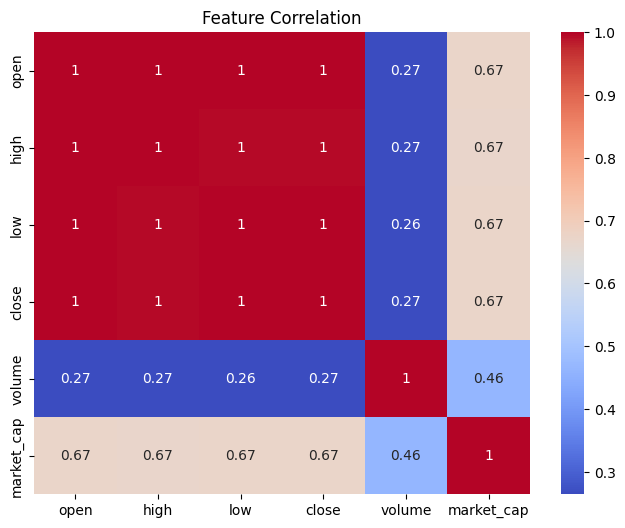

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [14]:
df['volatility'] = (df['high'] - df['low']) / df['close']

In [15]:
df[['high','low','close','volatility']].head()

,high,low,close,volatility
0,118.800003,107.142998,115.910004,0.100569
1,3.692460,3.346060,3.590890,0.096466
2,124.663002,106.639999,112.300003,0.160490
3,3.781020,3.116020,3.371250,0.197256
4,113.444000,97.699997,111.500000,0.141202


In [16]:
df['ma_7'] = df['close'].rolling(window=7).mean()
df['ma_14'] = df['close'].rolling(window=14).mean()

In [17]:
df['liquidity_ratio'] = df['volume'] / df['market_cap']

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
market_cap         0
timestamp          0
crypto_name        0
date               0
volatility         0
ma_7               0
ma_14              0
liquidity_ratio    0
dtype: int64

In [21]:
X = df[['open','high','low','close','volume','market_cap','ma_7','ma_14','liquidity_ratio']]
y = df['volatility']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
market_cap         0
timestamp          0
crypto_name        0
date               0
volatility         0
ma_7               0
ma_14              0
liquidity_ratio    0
dtype: int64

In [25]:
df = df.dropna().reset_index(drop=True)

In [26]:
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
market_cap         0
timestamp          0
crypto_name        0
date               0
volatility         0
ma_7               0
ma_14              0
liquidity_ratio    0
dtype: int64

In [27]:
X = df[['open','high','low','close','volume','market_cap','ma_7','ma_14','liquidity_ratio']]
y = df['volatility']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
df = df.dropna().reset_index(drop=True)

In [32]:
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
market_cap         0
timestamp          0
crypto_name        0
date               0
volatility         0
ma_7               0
ma_14              0
liquidity_ratio    0
dtype: int64

In [34]:
import numpy as np

np.isinf(df.select_dtypes(include='number')).sum()

open               0
high               0
low                0
close              0
volume             0
market_cap         0
volatility         0
ma_7               0
ma_14              0
liquidity_ratio    0
dtype: int64

In [35]:
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
market_cap         0
timestamp          0
crypto_name        0
date               0
volatility         0
ma_7               0
ma_14              0
liquidity_ratio    0
dtype: int64

In [36]:
np.isinf(df.select_dtypes(include='number')).sum()

open               0
high               0
low                0
close              0
volume             0
market_cap         0
volatility         0
ma_7               0
ma_14              0
liquidity_ratio    0
dtype: int64

In [37]:
df.dtypes

open                      float64
high                      float64
low                       float64
close                     float64
volume                    float64
market_cap                float64
timestamp                  object
crypto_name                object
date               datetime64[ns]
volatility                float64
ma_7                      float64
ma_14                     float64
liquidity_ratio           float64
dtype: object

In [38]:
X = df[['open','high','low','close','volume','market_cap','ma_7','ma_14','liquidity_ratio']]
y = df['volatility']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

RMSE: 0.05103153651554885
MAE: 0.026201825826997295
R2 Score: 0.5377305798960774
